Using K-Means Clustering to do banking customers segmentation 

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
c_data = pd.read_csv('data/german_credit_data.csv')
c_data.head()




,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [10]:
#check for missing values
print(c_data.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [14]:
# Drop missing values
c_data.dropna()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
7,7,35,male,3,rent,little,moderate,6948,36,car
9,9,28,male,3,own,little,moderate,5234,30,car
...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV
993,993,30,male,3,own,little,little,3959,36,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
998,998,23,male,2,free,little,little,1845,45,radio/TV


K-means is performed only on the numerical data so we choose the numerical columns for our analysis.

In [15]:
# check for numerical columns
c_data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [18]:
# select numerical columns for clustering
selected_columns = ['Age', 'Credit amount', 'Duration']
clustered_data = c_data.loc[:, selected_columns]
clustered_data.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [19]:
# Normalize the features for our model
from sklearn import preprocessing
#returns a numpy array
X = clustered_data.values 
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
normalized_data = pd.DataFrame(X_scaled)


To perform k-means clustering, we need to find the value of the ‘k’ number of clusters. For our example, we will be using several values of k for clustering and then selecting using the Elbow method.(Take some time to read the Elbow method in k-means clustering)

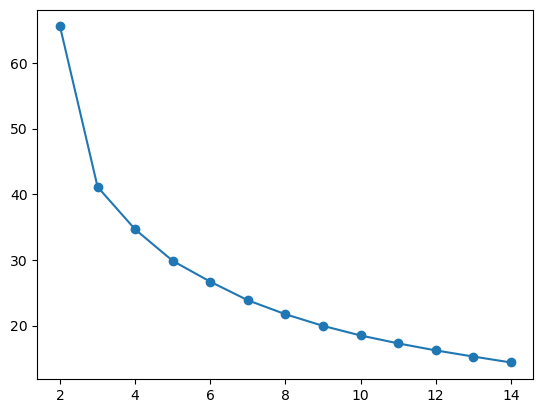

In [21]:
# plotting the Scree plot to find the optimum number of clusters. Read about the Scree plot at your own time.
import matplotlib.pyplot as plt
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in cluster_range:
    kmeans = KMeans(init='k-means++', n_clusters=c, n_init=100, random_state=0).fit(normalized_data)
    inertias.append(kmeans.inertia_)


plt.Figure()
plt.plot(cluster_range, inertias,marker = 'o')
plt.show()


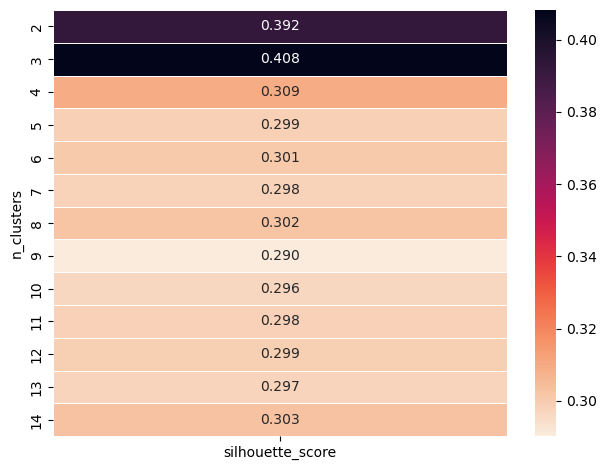

In [25]:
# We use the Silhouette value Method to find the value of ‘k’.

from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

cluster_range = range(2,15)
results = []
for c in cluster_range:
    clusterer = KMeans(init='k-means++', n_clusters=c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(normalized_data)
    silhoutte_avg = silhouette_score(normalized_data, cluster_labels)
    results.append([c, silhoutte_avg])
result = pd.DataFrame(results, columns=['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values = 'silhouette_score')
plt.figure()
sns.heatmap(pivot_km, annot=True, linewidth = .5, fmt='.3f', cmap =sns.cm.rocket_r)
plt.tight_layout()


In [44]:
kmeans_selected= KMeans(init= 'k-means++', n_clusters=3, n_init=100, random_state=1).fit(normalized_data)
labels = pd.DataFrame(kmeans_selected.labels_)
cluster_data = clustered_data.assign(Cluster = labels)


In [47]:
# Use table to interprate the clustering
grouped_c =cluster_data.groupby(['Cluster']).mean().round(1)
grouped_c

,Age,Credit amount,Duration
Cluster,,,
0,29.5,2221.8,16.5
1,34.4,7283.2,39.6
2,51.5,2492.4,16.2


Final Analysis



Cluster 0 – Young customers (cluster of 29.5 years) take low credit loans for a short duration

Cluster 1 – Middle-aged customers (cluster of 34.4 years) take high credit loans for a long duration

Cluster 2 – Old aged customers (cluster 51.5 years) take medium credit loans for a short duration

 